# Investigating the Enron Fraud with Machine Learning
### Udacity Nanodegree Project by Luiz Schiller

## Overview

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives.

> Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?

The goal of this project is to build a person of interest (POI, which means an individual who was indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity) identifier based on financial and email data made public as a result of the Enron scandal. Machine learning is an excellent tool for this kind of classification task as it can use patterns discovered from labeled data to infer the classes of new observations.

Our dataset combines the public record of Enron emails and financial data with a hand-generated list of POI's in the fraud case.

## Data Exploration

In [2]:
import sys
import cPickle as pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data, test_classifier

%matplotlib inline
pd.set_option('display.max_columns', None)

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
df = pd.DataFrame.from_dict(data_dict, orient='index')
df.replace('NaN', np.nan, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null bool
director_fees                17 non-null float64
deferred_income              49 non-null float

In [3]:
len(df[df['poi']])

18

There are 146 observations and 21 variables in our dataset - 6 email features, 14 financial features and 1 POI label - and they are divided between 18 POI's and 128 non-POI's.

There are a lot of missing values, so, before the data is fed into the machine learning models they are going to be filled by zeros.

## Outlier Investigation

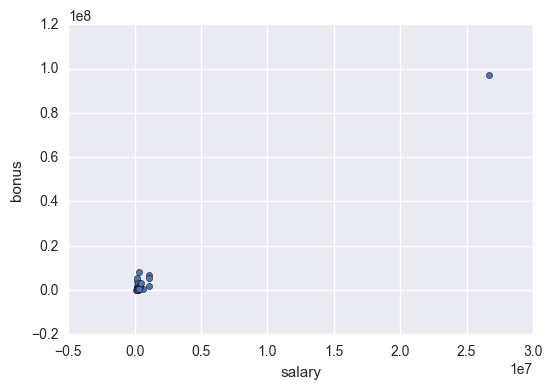

In [4]:
df.plot.scatter(x = 'salary', y = 'bonus')

There is a salary bigger than 2.5 *10^7 🤔. It seems too much even for Enron. Let's find out whoose is it.

In [5]:
df['salary'].idxmax()

'TOTAL'

This huge salary is the TOTAL of the salaries of the listed employees, so I'm going to remove it.

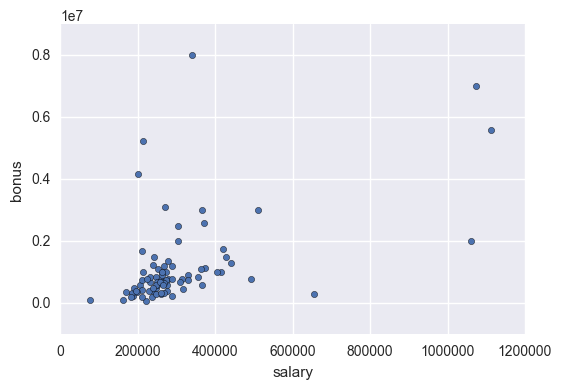

In [6]:
df.drop('TOTAL', inplace = True)
df.plot.scatter(x = 'salary', y = 'bonus')

## Create New Features

> What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.

Creating two features: 
- fraction of 'to_messages' received from a POI;
- fraction of 'from_messages' sent to a POI.

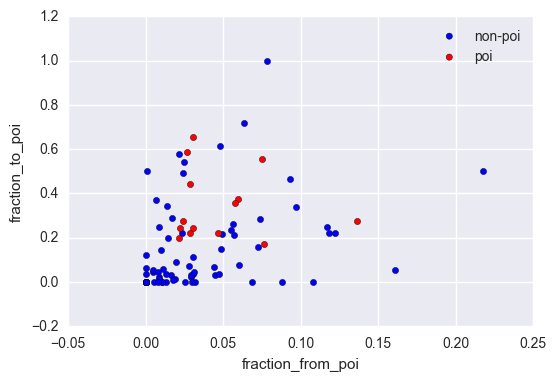

In [7]:
df['fraction_from_poi'] = df['from_poi_to_this_person'] / df['to_messages']
df['fraction_to_poi'] = df['from_this_person_to_poi'] / df['from_messages']

ax = df[df['poi'] == False].plot.scatter(x='fraction_from_poi', y='fraction_to_poi', color='blue', label='non-poi')
df[df['poi'] == True].plot.scatter(x='fraction_from_poi', y='fraction_to_poi', color='red', label='poi', ax=ax)

Comparing the results for the final chosen model with and without our new engineered features, we get the following results:

RESULTS
RESULTS
RESULTS
RESULTS
RESULTS

## Properly Scale Features

Since we are going to perform a Principal Component Analysis (PCA) to reduce dimensionality later on, and many machine learning models ask for scaled features, a standardization of the features is going to be applied as our first step of the classification pipeline.

To acomplish it I use the StandardScaler module from scikit learn, which standardizes features by removing the mean and scaling to unit variance.

## Intelligently Select Features

The next step in the pipeline is selecting the features that convey the most information to our model.

Leaving some features behind has some advantages, like reducing the noise in the classification, and saving processing time, since there are less features to compute.

The chosen method was scikit learn's SelectKBest using f_classif as scoring function. The f_classif function computes the ANOVA F-value between labels and features for classification tasks.

A list of feature counts were tested with the aid of a grid search (it will be discussed in a later section), and finally, for the chosen model, NNNNNN most important features were chosen:
AAAA
BBBB
CCCC

The output of the feature selection was used as input to PCA. The features were projected to a lower dimensional space, reducing dimensionality from NNNNNN features to XXXXXX principal components in our final chosen model.

## Pick an Algorithm

> What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms? 

I ended up using a XXXXXXXXXXXXXXXXX, which gave XXXXXXXXXXXXXXXXX scores. Some other algorithms tested were Gaussian Naïve-Bayes, Support Vector Machines, Decision Trees, AdaBoost...

The scores obtained for them are as follows:
XXXXXXXXXXXXXXX
XXXXXXXXXXXXXXX

## Tune the Algorithm

> What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).

A crucial part of selecting a machine learning algorithm is to adjust it's parameters in order to maximize the evaluation metrics. If the parameters are not properly tuned, the algorithm can underfit or overfit the data, hence producing suboptimal results.

To tune the algorithms, I used the GridSearchCV tool provided in scikit learn. It exhaustively searches for the best parameters between the ones specified in an array of possibilities. The parameters are chosen in order to optimize the chosen scoring function, in our case, f1 (the evaluation metrics will be better addressed on the evaluation section).


## Validation Strategy

> What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?

6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

In [26]:
### The first feature must be "poi".
features_list = ['poi', 'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments',
                 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments', 
                 'exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 
                 'total_stock_value', 'to_messages', 'from_messages', 'from_this_person_to_poi', 
                 'from_poi_to_this_person', 'shared_receipt_with_poi', 'fraction_from_poi', 'fraction_to_poi']

### Load the dictionary containing the dataset
filled_df = df.fillna(value='NaN') # featureFormat expects 'NaN' strings
data_dict = filled_df.to_dict(orient='index')

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
y, X = targetFeatureSplit(data)

In [13]:
def evaluate_model(grid, X, y):
    grid.fit(X, y)

    print "GridSearchCV best score (f1): {}".format(grid.best_score_)

    pred = grid.best_estimator_.predict(X)

    print "Accuracy: {}".format(accuracy_score(y, pred))
    print "Precision: {}".format(precision_score(y, pred))
    print "Recall: {}".format(recall_score(y, pred))
    print "F1: {}".format(f1_score(y, pred))

In [10]:
sss = StratifiedShuffleSplit(n_splits=1000, test_size=0.1, random_state=42)

SELECTOR__K = [10, 13, 15, 18, 'all']
REDUCER__N_COMPONENTS = [2, 4, 6, 8, 10]

### Gaussian Naive-Bayes

In [12]:
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest()),
        ('reducer', PCA(random_state=42)),
        ('classifier', GaussianNB())
    ])

param_grid = {
    'scaler': [None, StandardScaler()],
    'selector__k': SELECTOR__K,
    'reducer__n_components': REDUCER__N_COMPONENTS
}

gnb_grid = GridSearchCV(pipe, param_grid, scoring='f1', cv=sss, n_jobs=-1)

evaluate_model(gnb_grid, X, y)

test_classifier(gnb_grid.best_estimator_, my_dataset, features_list)

GridSearchCV best score (f1): 0.323411904762
Accuracy: 0.840277777778
Precision: 0.352941176471
Recall: 0.333333333333
F1: 0.342857142857


### Support Vector Machine Classifier

In [ ]:
C_PARAM = [1., 10., 100., 1000.]
KERNEL = ['rbf', 'sigmoid']

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest()),
        ('reducer', PCA(random_state=42)),
        ('classifier', SVC())
    ])

param_grid = {
    'scaler': [None, StandardScaler()],
    'selector__k': SELECTOR__K,
    'reducer__n_components': REDUCER__N_COMPONENTS,
    'classifier__C': C_PARAM,
    'classifier__kernel': KERNEL
}

svc_grid = GridSearchCV(pipe, param_grid, scoring='f1', cv=sss, n_jobs=-1)

evaluate_model(svc_grid, X, y)

test_classifier(svc_grid.best_estimator_, my_dataset, features_list)

0.464646464646
Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.85300	Precision: 0.44426	Recall: 0.40850	F1: 0.42563	F2: 0.41518
	Total predictions: 15000	True positives:  817	False positives: 1022	False negatives: 1183	True negatives: 11978

### Decision Tree Classifier

In [32]:
MIN_SAMPLES_SPLIT = [2, 4, 6, 8]

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest()),
        ('reducer', PCA(random_state=42)),
        ('classifier', DecisionTreeClassifier())
    ])

param_grid = {
    'scaler': [None, StandardScaler()],
    'selector__k': SELECTOR__K,
    'reducer__n_components': REDUCER__N_COMPONENTS,
    'classifier__min_samples_split': MIN_SAMPLES_SPLIT
}

tree_grid = GridSearchCV(pipe, param_grid, scoring='f1', cv=sss, n_jobs=-1)

evaluate_model(tree_grid, X, y)

test_classifier(tree_grid.best_estimator_, my_dataset, features_list)

GridSearchCV best score (f1): 0.532608695652
Accuracy: 0.724137931034
Precision: 0.285714285714
Recall: 0.4
F1: 0.333333333333
Pipeline(steps=[('scale', None), ('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])
	Accuracy: 0.78853	Precision: 0.22770	Recall: 0.24500	F1: 0.23603	F2: 0.24133
	Total predictions: 15000	True positives:  490	False positives: 1662	False negatives: 1510	True negatives: 11338



### AdaBoost Classifier

In [33]:
adaboost = AdaBoostClassifier()
N_ESTIMATORS = [50, 100, 150]

pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest()),
        ('reducer', PCA(random_state=42)),
        ('classifier', AdaBoostClassifier())
    ])

param_grid = {
    'scaler': [None, StandardScaler()],
    'selector__k': SELECTOR__K,
    'reducer__n_components': REDUCER__N_COMPONENTS,
    'classifier__n_estimators': N_ESTIMATORS
}

adaboost_grid = GridSearchCV(pipe, param_grid, scoring='f1', cv=sss, n_jobs=-1)

evaluate_model(adaboost_grid, X, y)

test_classifier(adaboost_grid.best_estimator_, my_dataset, features_list)

GridSearchCV best score (f1): 0.379296066253
Accuracy: 0.896551724138
Precision: 1.0
Recall: 0.4
F1: 0.571428571429
Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reduce_dim', SelectKBest(k=12, score_func=<function f_classif at 0x000000000C8C6DD8>)), ('classify', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None))])
	Accuracy: 0.84087	Precision: 0.37295	Recall: 0.28400	F1: 0.32245	F2: 0.29823
	Total predictions: 15000	True positives:  568	False positives:  955	False negatives: 1432	True negatives: 12045



## References

- http://sebastianraschka.com/Articles/2014_about_feature_scaling.html